In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robustness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

* first, whatever the learning rate, the convergence is not complete without homeostasis,
* second, we achieve better convergence for similar learning rates and on a certain range of learning rates for the homeostasis
* third, the smoothing parameter ``alpha_homeo`` has to be properly set to achieve a good convergence.
* last, this homeostatic rule works with the different variants of sparse coding.

See also :
* http://blog.invibe.net/posts/2017-03-14-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2017-03-15-reproducing-olshausens-classical-sparsenet-part-2.html for a description of how we managed to implement the homeostasis
* In [an extension](http://blog.invibe.net/posts/2017-05-13-extending-olshausens-classical-sparsenet.html), we will study how homeostasis (cooperation) may be an essential ingredient to this algorithm working on a winner-take-all basis (competition). This extension has been published as Perrinet, Neural Computation (2010) (see  http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl ).

This is joint work with [Victor Boutin](http://invibe.net/LaurentPerrinet/VictorBoutin).

<!-- TEASER_END -->

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

DEBUG_DOWNSCALE, verbose, tag = 10, 100, ''
DEBUG_DOWNSCALE, verbose, tag = 1, 0, ''
DEBUG_DOWNSCALE, verbose, tag = 10, 10, 'DEBUG'

N_scan = 7
database = 'database/'
database = '../../2017-02-07_UnsupervisedLearning/database/'

exp = 'comp_'

shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, database=database)
data = shl.get_data(matname='serre07_data' + tag)


loading the data called : /tmp/data_cache/serre07_dataDEBUG_data


## 1. With diferent learning rates but without homeostasis

Here,we only ensure the norm ofthe filters is constant.

loading the dico called : comp_no homeo - eta=0.001
No cache found /tmp/data_cache/comp_no homeo - eta=0.001_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp done in 11.17s.
loading the code called : /tmp/data_cache/comp_no homeo - eta=0.001_coding.npy
No cache found /tmp/data_cache/comp_no homeo - eta=0.0021544346900318834_dico.pkl: Learning the dictionary with algo = mp 
 Training on 8180 patches... Iteration   0 /   1638 (elapsed time:   0s,  0.0mn)
Iteration  164 /   1638 (elapsed time:  130s,  2.0mn)
Iteration  328 /   1638 (elapsed time:  257s,  4.0mn)
Iteration  492 /   1638 (elapsed time:  384s,  6.0mn)
Iteration  656 /   1638 (elapsed time:  509s,  8.0mn)
Iteration  820 /   1638 (elapsed time:  635s,  10.0mn)
Iteration  984 /   1638 (elapsed time:  759s,  12.0mn)
Iteration  1148 /   1638 (elapsed time:  884s,  14.0mn)
Iteration  1312 /   1638 (elapsed time:  1009s,  16.0mn)
Iteration  1476 /   1638 (elapsed time:  1135s,  18.0mn)
Learning code... done (total 

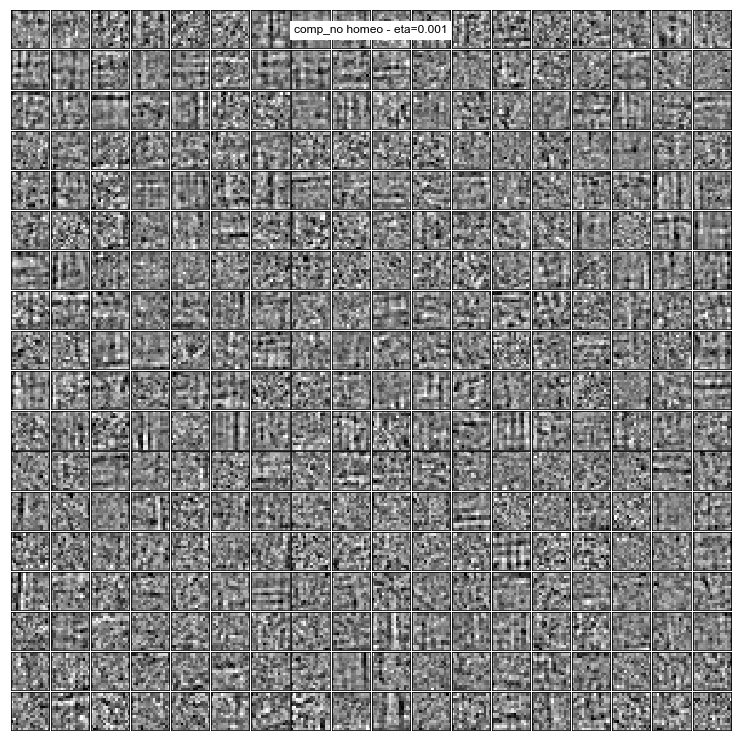

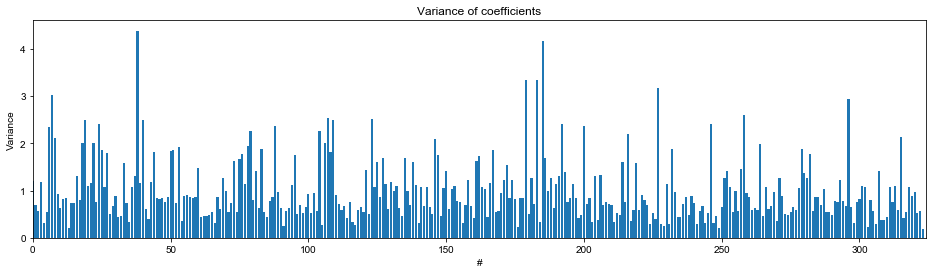

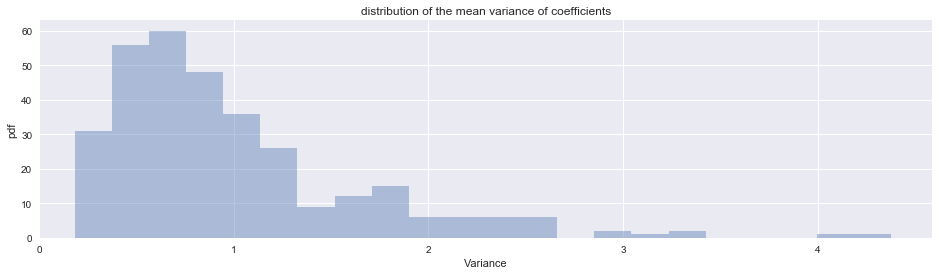

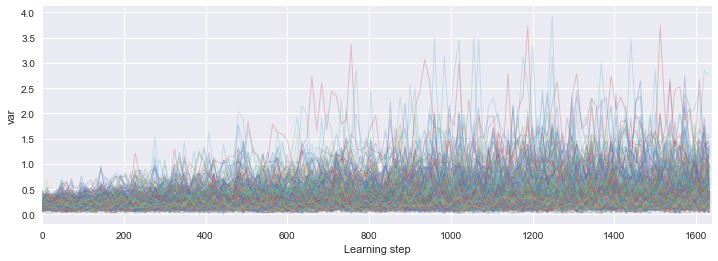

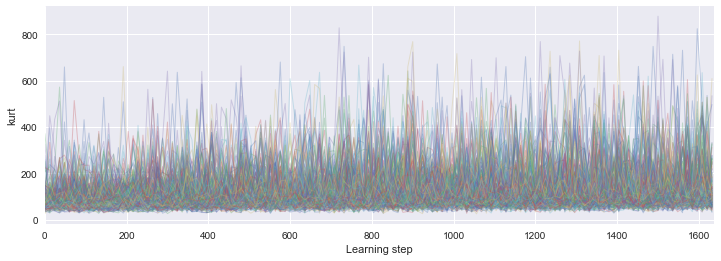

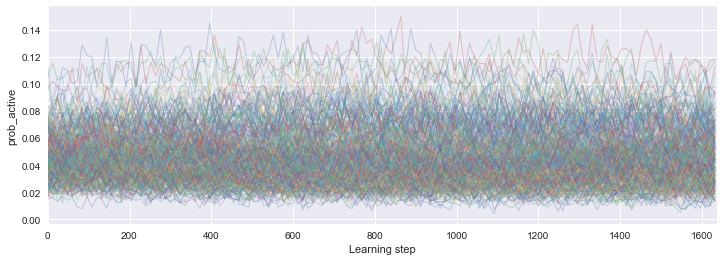

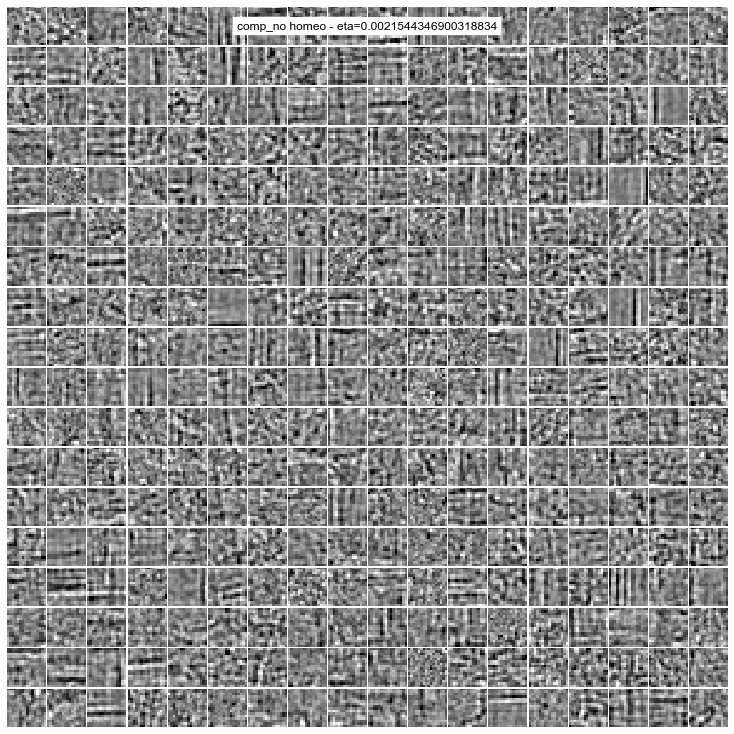

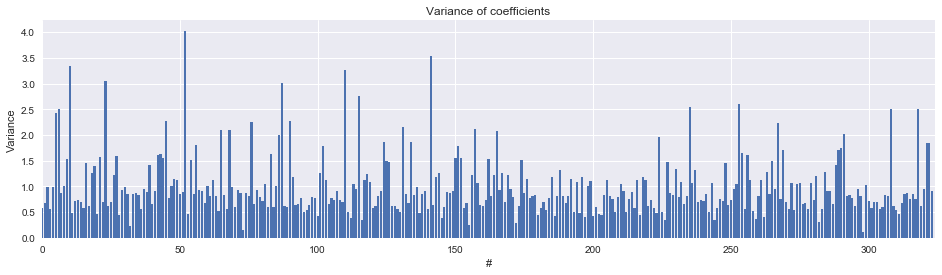

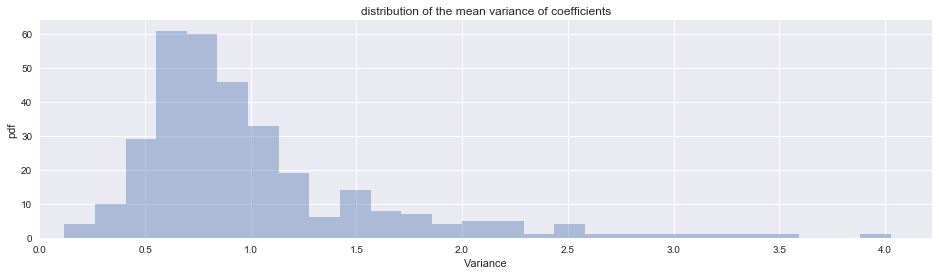

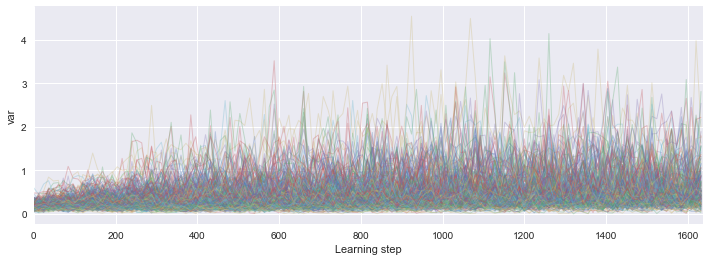

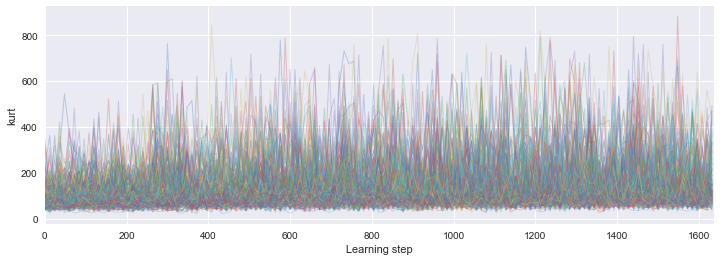

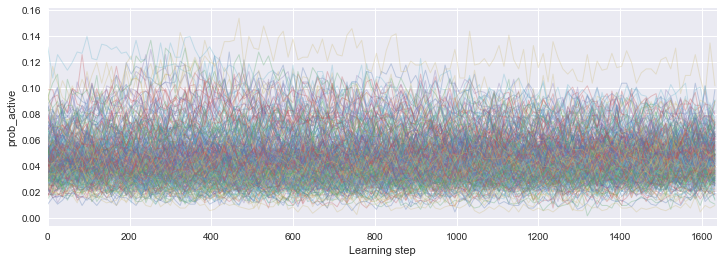

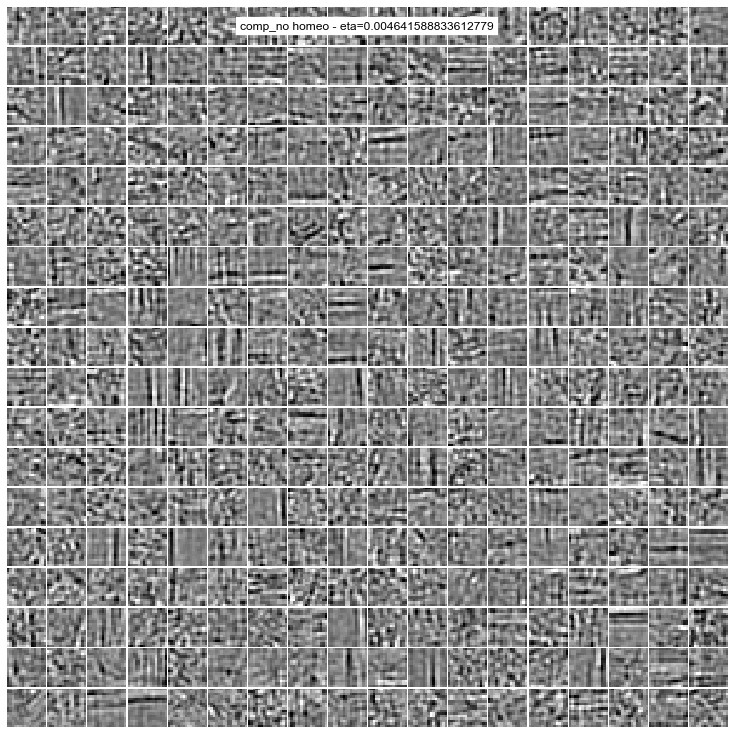

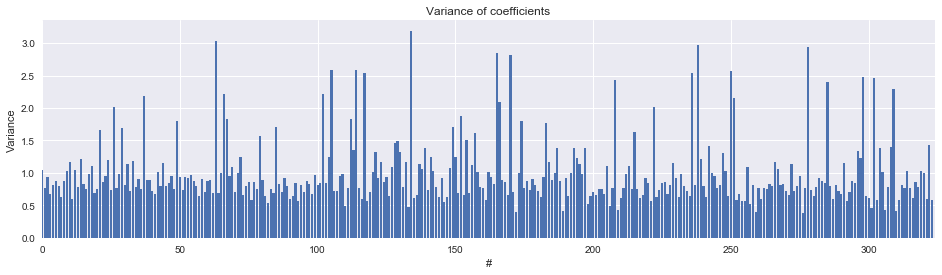

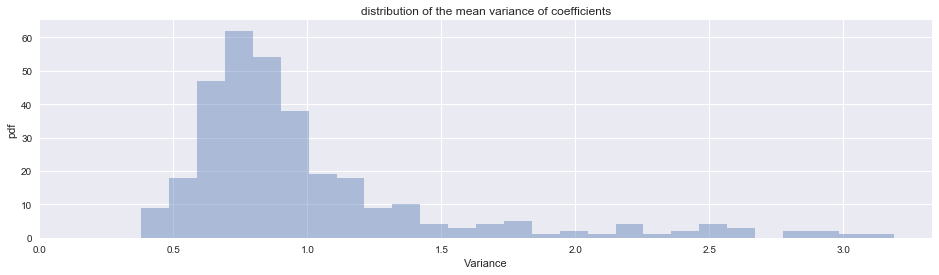

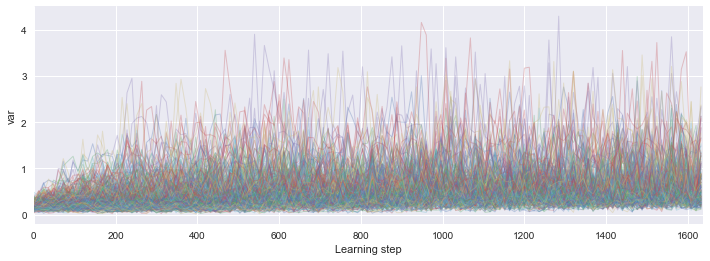

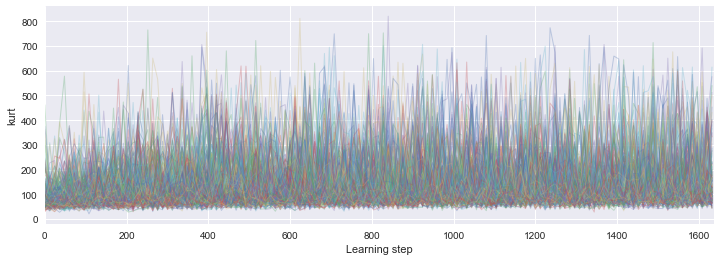

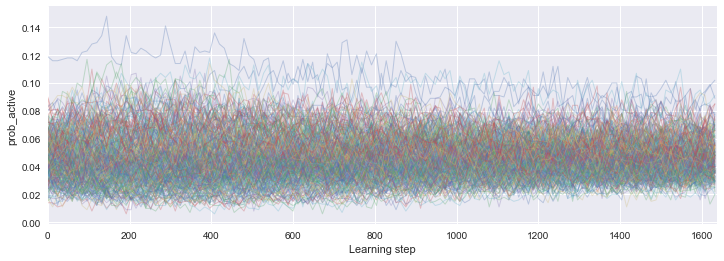

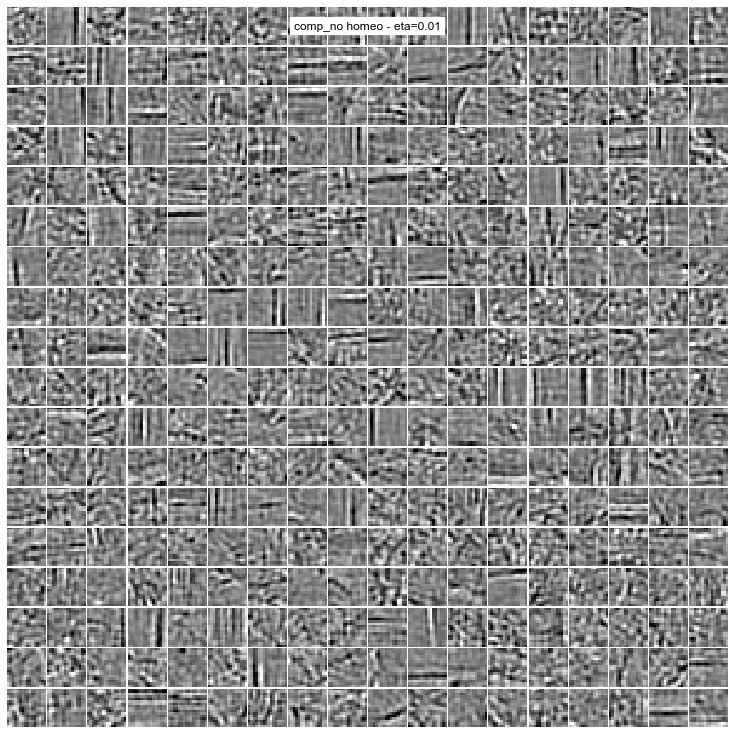

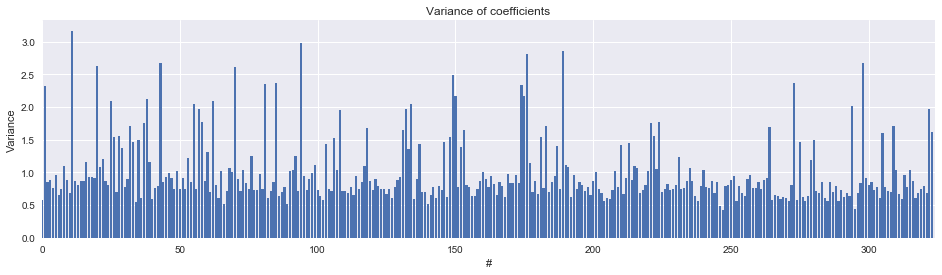

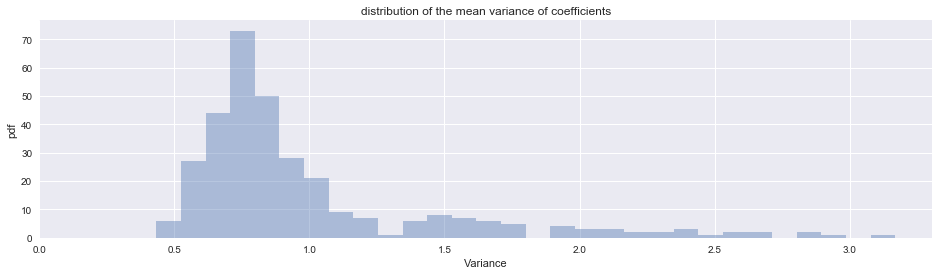

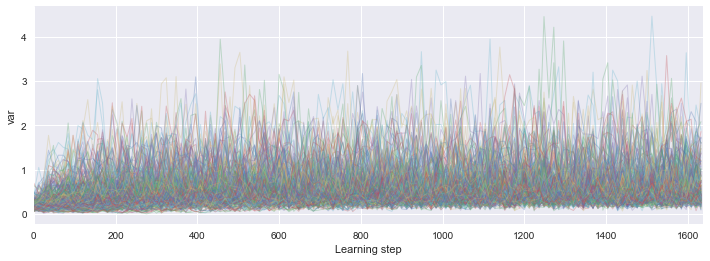

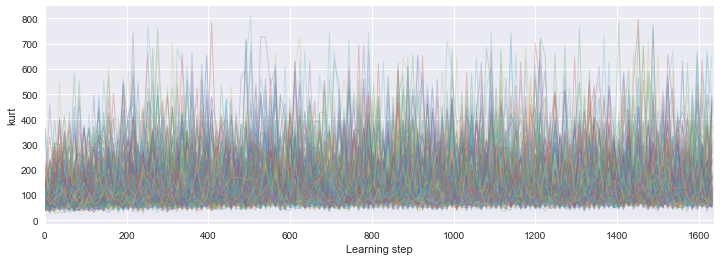

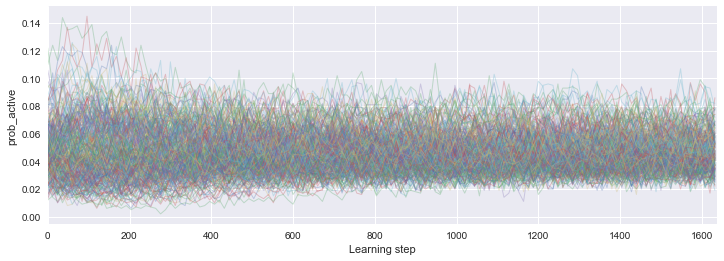

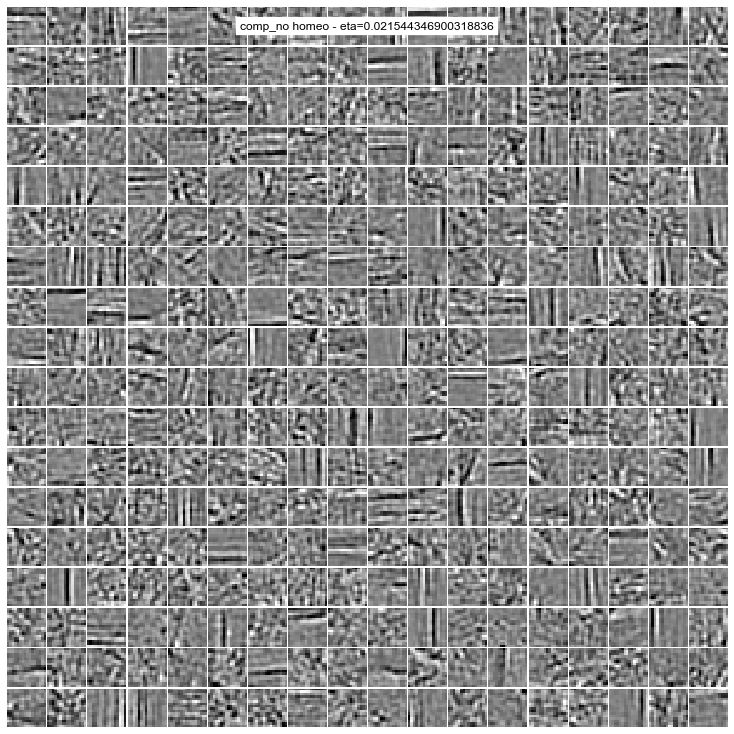

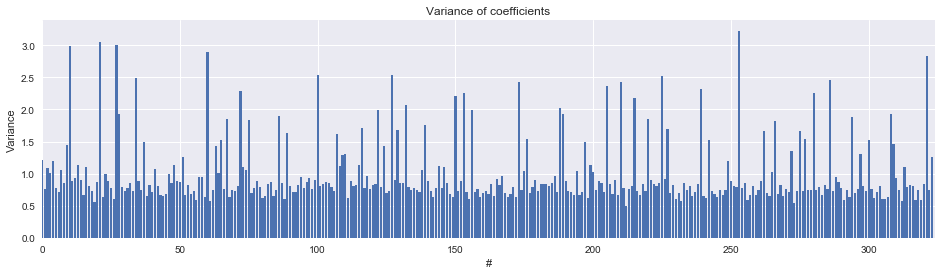

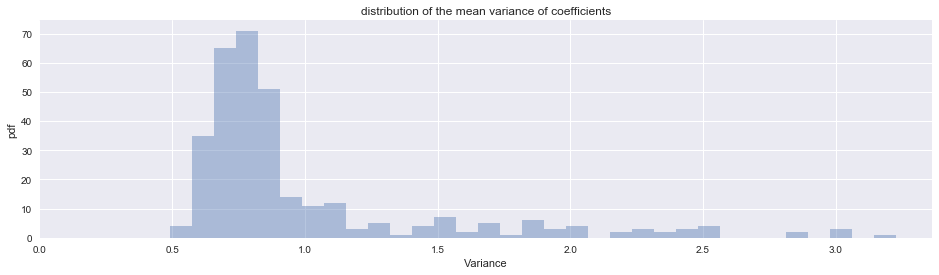

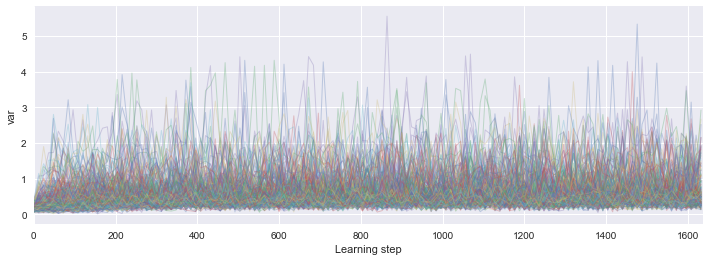

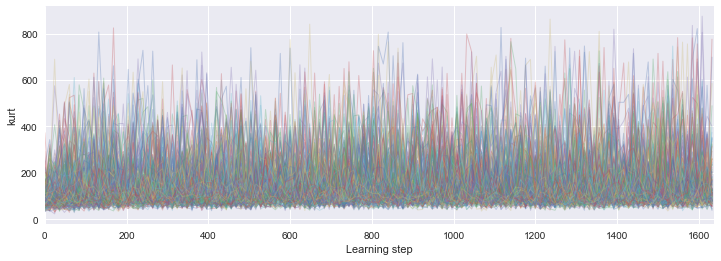

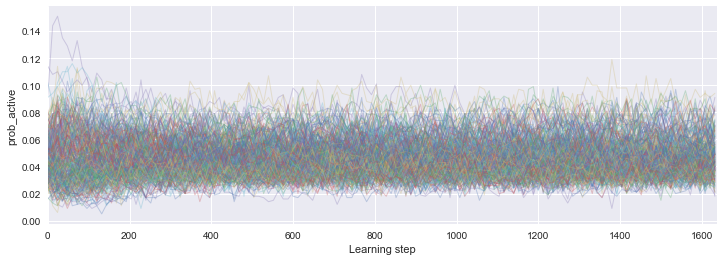

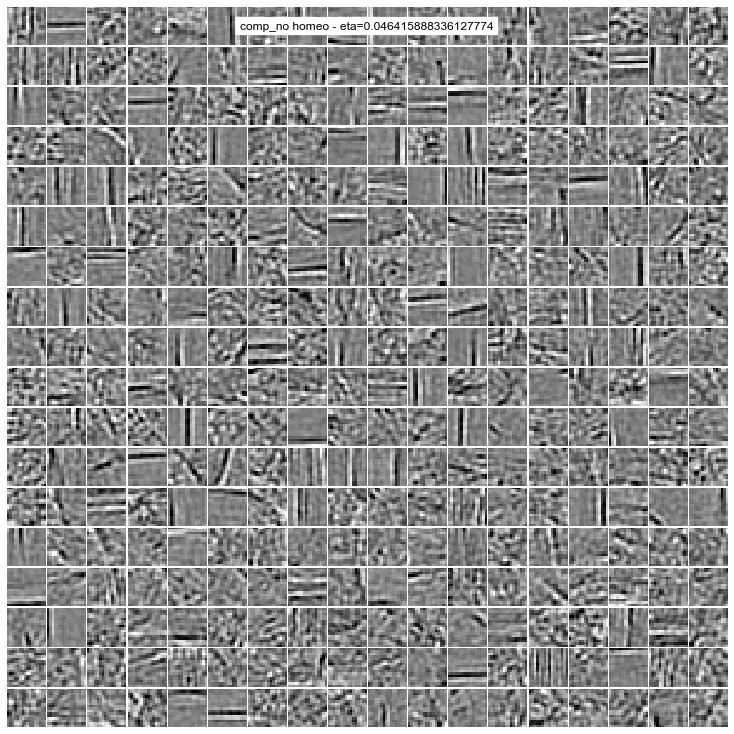

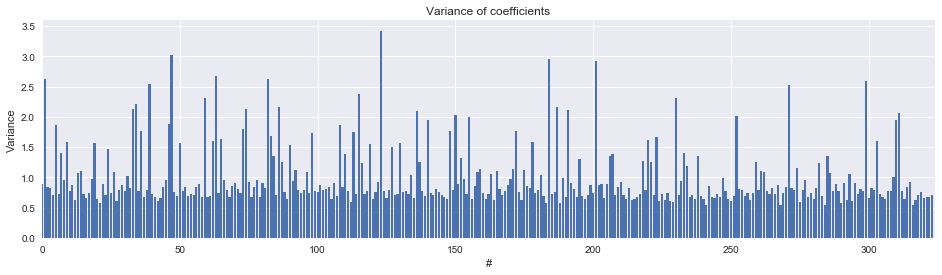

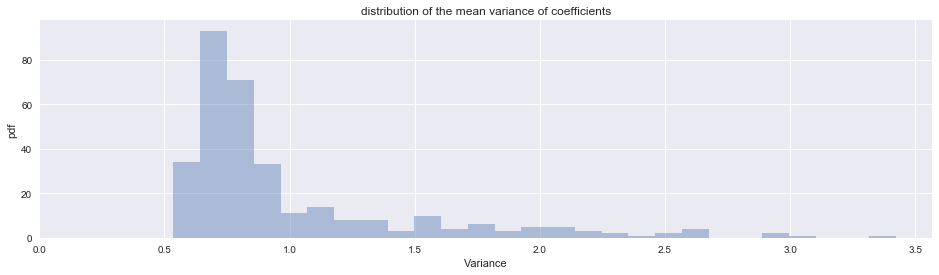

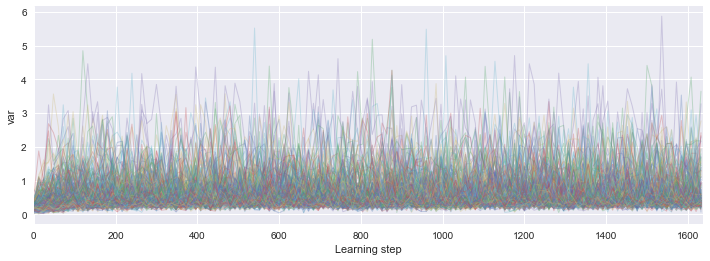

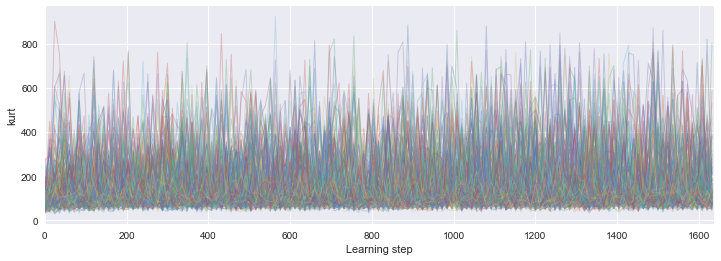

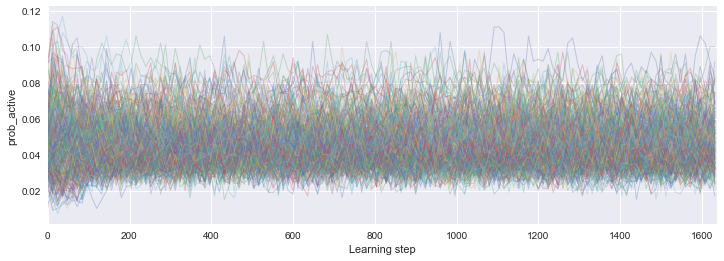

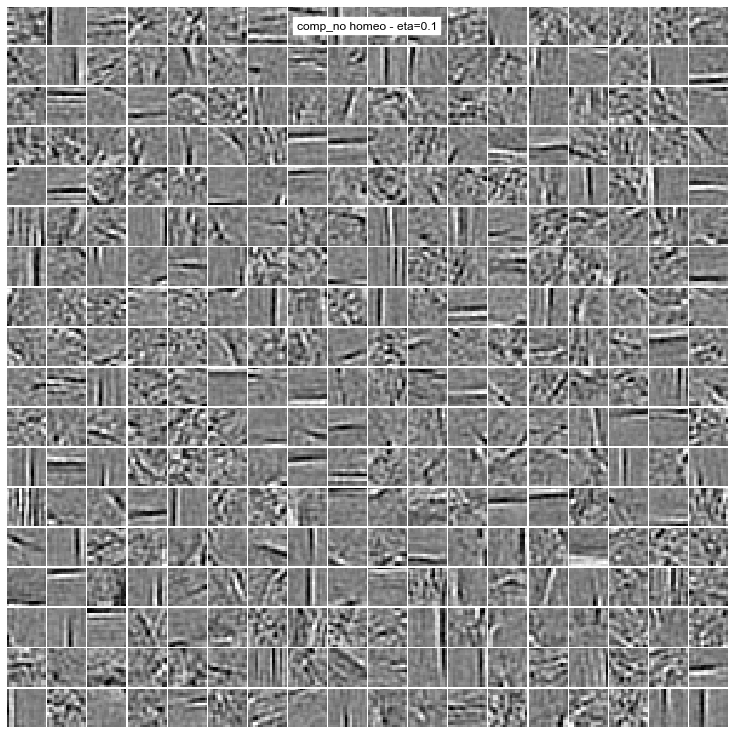

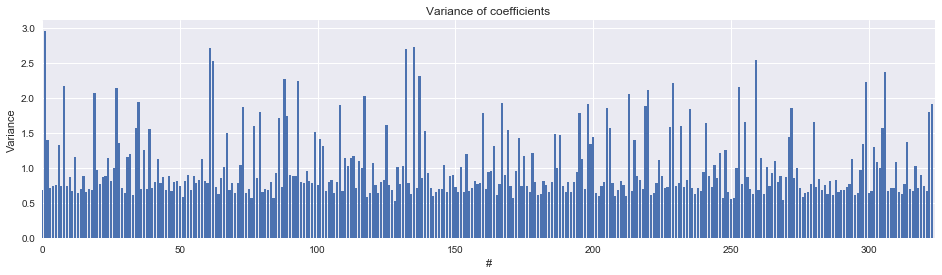

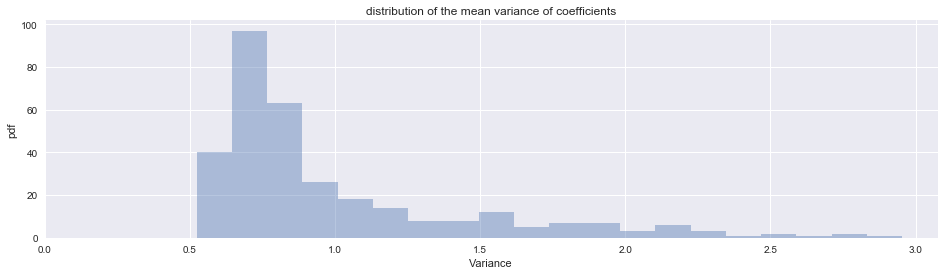

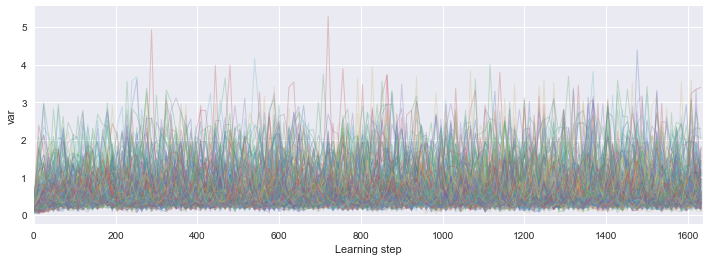

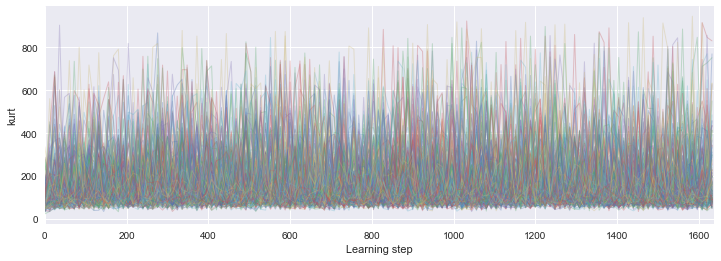

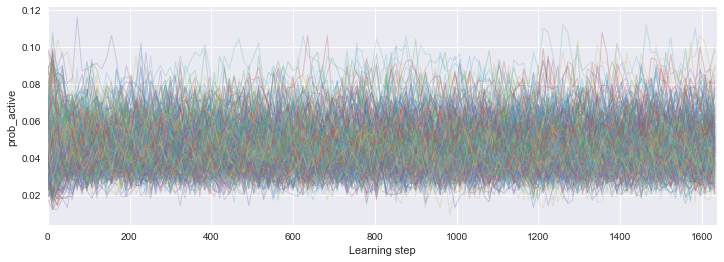

In [3]:
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = exp + 'no homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta_homeo=0, eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

## 2. Homeostasis à-la-SparseNet

In [4]:
shl = SHL()
data = shl.get_data()
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = exp + 'homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

--- Logging error ---
Traceback (most recent call last):
  File "/Users/laurentperrinet/pool/science/BICV/SLIP/SLIP/SLIP.py", line 246, in list_database
    filelist = os.listdir(self.full_url(name_database))
FileNotFoundError: [Errno 2] No such file or directory: 'database/serre07_distractors'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/pyth

MissingSchema: Invalid URL 'database/serre07_distractors/i': No schema supplied. Perhaps you meant http://database/serre07_distractors/i?

In [ ]:
dico.record_each

In [ ]:
shl = SHL()
data = shl.get_data()
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*shl.eta_homeo:
    matname = exp + 'homeo - eta_homeo={}'.format(eta_homeo)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta_homeo=eta_homeo, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

## 4. with different l0_sparseness parameters 


In [ ]:
N_scan = int(15/(DEBUG_DOWNSCALE)**.3)
for l0_sparseness in 2**np.arange(8):
    matname = exp + 'l0_sparseness={}'.format(l0_sparseness)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, l0_sparseness=l0_sparseness, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

## Version used

In [ ]:
import version_information
%version_information numpy, shl_scripts